# Concevez une application au service de la santé publique
## Nettoyage des données

## 1. Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("en.openfoodfacts.org.products.csv", sep='\t', low_memory=False)

## 2. Analyse du jeu de donnée

In [3]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,product_name,abbreviated_product_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,nutrinet-sante,jeunes pousses,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1656948610,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,kiliweb,Andrè,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1656488106,2022-06-29T07:35:06Z,stephane,L.casei,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000000000026772226,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1654250311,2022-06-03T09:58:31Z,1654270474,2022-06-03T15:34:34Z,quentinbrd,Skyr,NaN,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,kiliweb,Vitória crackers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(2796522, 201)

([<matplotlib.patches.Wedge at 0x1ee17495700>,
 [Text(-0.44269338950456927, 1.0069868732456029, 'float64'),
  Text(0.4110041050855612, -1.0203311352707107, 'object'),
  Text(1.0994625965453784, -0.03438020938992116, 'int64')],
 [Text(-0.24146912154794684, 0.5492655672248743, '63%'),
  Text(0.22418405731939697, -0.5565442556022058, '36%'),
  Text(0.5997068708429335, -0.01875284148541154, '1%')])

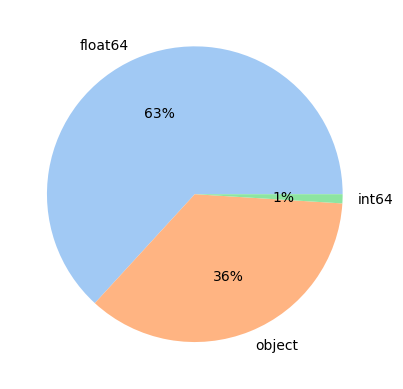

In [5]:
type_count = pd.DataFrame(data.dtypes.value_counts(), columns=['count'])
type_count['prct'] = type_count['count'] / type_count['count'].sum() * 100

colors = sns.color_palette('pastel')
plt.title('Répartition par type de données')
plt.pie(type_count['prct'], labels=type_count.index, colors=colors, autopct='%.0f%%')

C:\Users\octav\AppData\Local\Temp\ipykernel_7596\3294434154.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  prct_na = pd.Series()


([<matplotlib.patches.Wedge at 0x1ee17ae05b0>,
 [Text(-0.8550310512692753, 0.6920418349820753, 'Non renseignés'),
  Text(0.8550310836660907, -0.6920417949551825, 'Renseignés')],
 [Text(-0.46638057341960465, 0.37747736453567743, '78%'),
  Text(0.4663805910905948, -0.37747734270282673, '22%')])

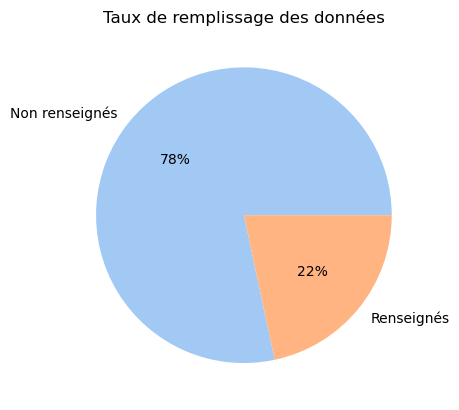

In [22]:
prct_na = pd.Series()
prct_na['Non renseignés'] = data.isna().sum().sum() / (data.shape[0]*data.shape[1]) 
prct_na['Renseignés'] = data.notna().sum().sum() / (data.shape[0]*data.shape[1])

colors = sns.color_palette('pastel')
plt.title("Taux de remplissage des données")
plt.pie(prct_na, labels=prct_na.index, colors=colors, autopct='%.0f%%')

In [307]:
data.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'last_modified_by',
 'product_name',
 'abbreviated_product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_en',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'origins_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'ingredients_tags',
 'ingredients_analysis_tags',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutrition_data',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'nutriscore_score',
 'nutriscore_grade',
 'nova_group',
 'pnns

## 3. Réduction du jeu de données en prévision de l'analyse exploratoire

On réduit les données afin d'avoir :
- Les données pour la France
- Les variables qui nous intéressent uniquement pour l'application
- Pas de doublons
- Pas de valeurs aberrantes
- Le moins de valeurs manquantes possible

### Réduction aux données Françaises

In [308]:
data = data.loc[data["countries"].str.contains('France|fr', case=False, regex=True, na=False), :]

data.shape

(966573, 201)

### Sélection des variables pertinantes

In [309]:
columns_kept = ['code',
 'product_name',
 'categories',
 'labels_tags',
 'nutriscore_score',
 'nutriscore_grade',
 'food_groups_tags',
 'energy-kcal_100g',
 'fat_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'vitamin-a_100g',
 'vitamin-d_100g',
 'vitamin-e_100g',
 'vitamin-k_100g',
 'vitamin-c_100g',
 'vitamin-b1_100g',
 'vitamin-b2_100g',
 'vitamin-pp_100g',
 'vitamin-b6_100g',
 'vitamin-b9_100g',
 'vitamin-b12_100g',
 'silica_100g',
 'bicarbonate_100g',
 'potassium_100g',
 'chloride_100g',
 'calcium_100g',
 'phosphorus_100g',
 'iron_100g',
 'magnesium_100g',
 'zinc_100g',
 'copper_100g',
 'manganese_100g']

In [310]:
data = data[columns_kept]
data.head(10)

,code,product_name,categories,labels_tags,nutriscore_score,nutriscore_grade,food_groups_tags,energy-kcal_100g,fat_100g,saturated-fat_100g,...,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g
0,00000000000000225,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000000000026772226,Skyr,"Produits laitiers, Desserts, Produits fermenté...",NaN,-5.0,a,"en:milk-and-dairy-products,en:dairy-desserts",57.0,0.2,0.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000017,Vitória crackers,NaN,NaN,NaN,NaN,NaN,375.0,7.0,3.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000031,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,0000000000100,moutarde au moût de raisin,"Condiments, Sauces, Moutardes, en:groceries",fr:delois-france,18.0,d,"en:fats-and-sauces,en:dressings-and-sauces",NaN,8.2,2.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0000000000123,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,21.0,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0000000000178,Mini coco,NaN,NaN,NaN,NaN,NaN,60.0,3.0,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,0000000000208,Pistou d'ail des ours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,0000000000284,Pain maïs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,0000000000291,Mendiants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Suppression des codes non EAN-13

In [311]:
def check_ean(ean):
    err = 0
    even = 0
    odd = 0
    check_bit = ean[len(ean)-1]#get check bit(last bit)
    check_val = ean[:-1]#Get all vals except check bit

    if len(ean) != 13:#Check the input length
        return False
    else:
        for index,num  in enumerate(check_val):#Gather Odd and Even Bits
            if index%2 == 0:
                even += int(num)
            else:
                odd += int(num)
        if ((3*odd)+even+int(check_bit)) % 10 == 0:# Check if the algorithm 3 * odd parity + even parity + check bit matches
            return True
        else:
            return False

In [312]:
mask = [check_ean(code) for code in data['code']]
data = data[mask]
data

,code,product_name,categories,labels_tags,nutriscore_score,nutriscore_grade,food_groups_tags,energy-kcal_100g,fat_100g,saturated-fat_100g,...,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g
4,0000000000017,Vitória crackers,NaN,NaN,NaN,NaN,NaN,375.0,7.0,3.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000031,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0000000000123,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,21.0,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0000000000178,Mini coco,NaN,NaN,NaN,NaN,NaN,60.0,3.0,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,0000000000208,Pistou d'ail des ours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2796499,9999991953895,Crème de Marrons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2796500,9999992756068,Steak haché,"Viandes, Bœuf, Steaks de viande, Steaks de bœu...",en:halal,NaN,NaN,"en:fish-meat-eggs,en:meat,en:meat-other-than-p...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2796501,9999992756112,Steak haché,NaN,en:halal,NaN,NaN,NaN,196.0,14.0,6.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2796508,9999999004360,Minis beignets,"Snacks,Snacks sucrés,Beignets sucrés",NaN,15.0,d,NaN,333.0,20.2,6.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Suppression des doublons sur le code barre

In [313]:
data.loc[data[['code']].duplicated(keep=False),:]

,code,product_name,categories,labels_tags,nutriscore_score,nutriscore_grade,food_groups_tags,energy-kcal_100g,fat_100g,saturated-fat_100g,...,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g
484492,0326496301163,Pat'atouille,"Céréales et pommes de terre,Céréales et dérivé...","en:non-eu-agriculture,en:source-of-fibre,en:eu...",-4.0,a,"en:cereals-and-potatoes,en:cereals",334.0,1.60,0.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484493,0326496301163,Pat'atouille,"Aliments et boissons à base de végétaux, Alime...","en:no-preservatives,en:non-eu-agriculture,en:s...",-4.0,a,"en:cereals-and-potatoes,en:cereals",334.0,1.60,0.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003120,2700963001059,Jardin anglais,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003121,2700963001059,Jardin anglais,NaN,NaN,NaN,NaN,NaN,1.0,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049416,3033610080541,Saupon fumé sauvage du pacifique,NaN,NaN,NaN,NaN,NaN,123.0,2.60,0.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049417,3033610080541,Saumon fumé sauvage du Pacifique,en:saumon fumé sauvage du pacifique,NaN,11.0,d,NaN,123.0,2.60,0.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072358,3108004000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072359,3108004000006,NaN,"Produits laitiers, Produits fermentés, Produit...",NaN,NaN,NaN,"en:milk-and-dairy-products,en:cheese",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299145,3477610001135,pâte en croûte halal,"Viandes,Charcuteries,Charcuteries cuites,Pâté ...",en:halal,NaN,NaN,"en:fish-meat-eggs,en:processed-meat",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299146,3477610001135,pâte en croûte halal,"Viandes et dérivés, Viandes, Charcuteries, Cha...",en:halal,NaN,NaN,"en:fish-meat-eggs,en:processed-meat",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [314]:
# Fonction de merging des duplicats : float ou int => mean , str => first

# autre méthode :
# df.drop_duplicates(key, keep='first')

def mergeDuplicate(df, key) :
    duplicate = df.loc[df[key].duplicated(keep=False),:]
    df_gb = duplicate.groupby(key)
    df_nodup = pd.DataFrame()
    
    for column in df.columns:
        if type(column) != str:
            df_nodup[column] = df_gb[column].agg('mean')
        else:
            df_nodup[column] = df_gb[column].first()
    
    data_out = df.drop_duplicates(subset=key, keep=False)
    data_out = pd.concat([data_out, df_nodup], ignore_index=True)
    return data_out

In [315]:
data_cleaned = mergeDuplicate(data, ['code'])

In [316]:
data_cleaned

,code,product_name,categories,labels_tags,nutriscore_score,nutriscore_grade,food_groups_tags,energy-kcal_100g,fat_100g,saturated-fat_100g,...,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g
0,0000000000017,Vitória crackers,NaN,NaN,NaN,NaN,NaN,375.0,7.00,3.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,21.0,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000178,Mini coco,NaN,NaN,NaN,NaN,NaN,60.0,3.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000208,Pistou d'ail des ours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894011,3700320230572,glace artisanale corse coco,"Desserts, Surgelés, Desserts glacés, Glaces et...",None,6.0,c,"en:milk-and-dairy-products,en:ice-cream",248.0,15.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894012,3700439700348,None,"Petit-déjeuners, Produits à tartiner, Produits...",en:pdo,NaN,None,"en:sugary-snacks,en:sweets",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894013,3770008983205,REMYX VODKA Aquatique,"Boissons,Boissons alcoolisées,Alcools forts,Ea...",None,NaN,None,en:alcoholic-beverages,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894014,6703501220017,Farine T45,"Aliments et boissons à base de végétaux,Alimen...",None,-5.0,a,"en:cereals-and-potatoes,en:cereals",351.0,0.82,0.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Taux de valeurs manquantes

In [317]:
prct_na = data_cleaned.notna().sum() / data_cleaned.shape[0] * 100
prct_na.sort_values().head(10)

silica_100g         0.011633
vitamin-k_100g      0.032997
bicarbonate_100g    0.041498
copper_100g         0.050111
manganese_100g      0.054250
chloride_100g       0.064317
zinc_100g           0.121810
vitamin-b9_100g     0.183330
phosphorus_100g     0.197983
vitamin-b12_100g    0.206148
dtype: float64

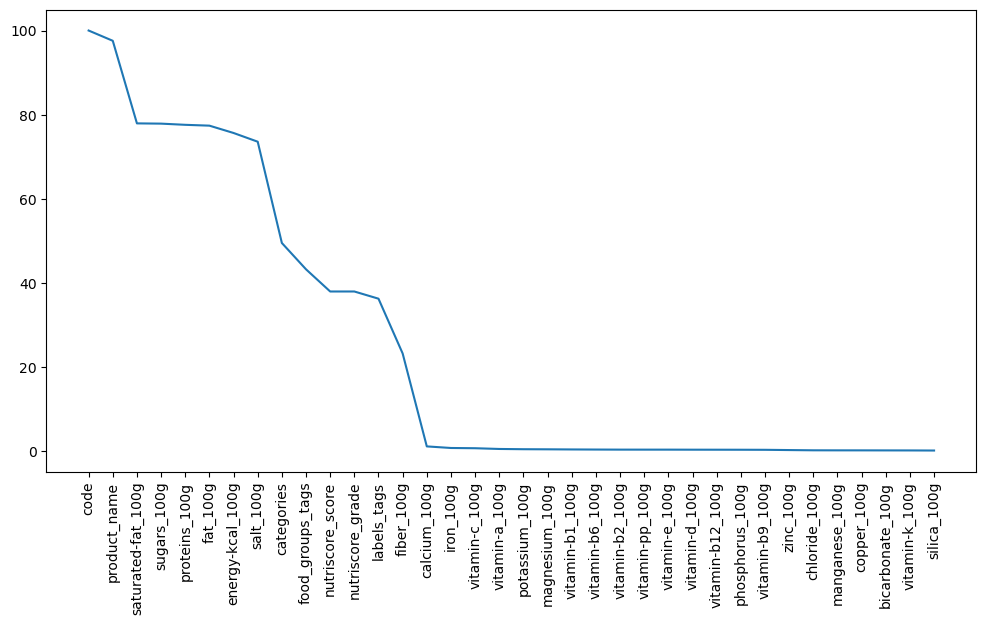

In [318]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.plot(prct_na.sort_values(ascending=False))

Très peu de valeurs renseignées, on retire donc les variables remplies à moins de 10% (minéraux et vitamines).

In [319]:
del_columns = ['vitamin-a_100g',
 'vitamin-d_100g',
 'vitamin-e_100g',
 'vitamin-k_100g',
 'vitamin-c_100g',
 'vitamin-b1_100g',
 'vitamin-b2_100g',
 'vitamin-pp_100g',
 'vitamin-b6_100g',
 'vitamin-b9_100g',
 'vitamin-b12_100g',
 'silica_100g',
 'bicarbonate_100g',
 'potassium_100g',
 'chloride_100g',
 'calcium_100g',
 'phosphorus_100g',
 'iron_100g',
 'magnesium_100g',
 'zinc_100g',
 'copper_100g',
 'manganese_100g']

data_cleaned = data_cleaned.drop(columns=del_columns)

[Text(0.5, 0, 'Variables'), Text(0, 0.5, 'Remplissage (%)'), (0.0, 100.0)]

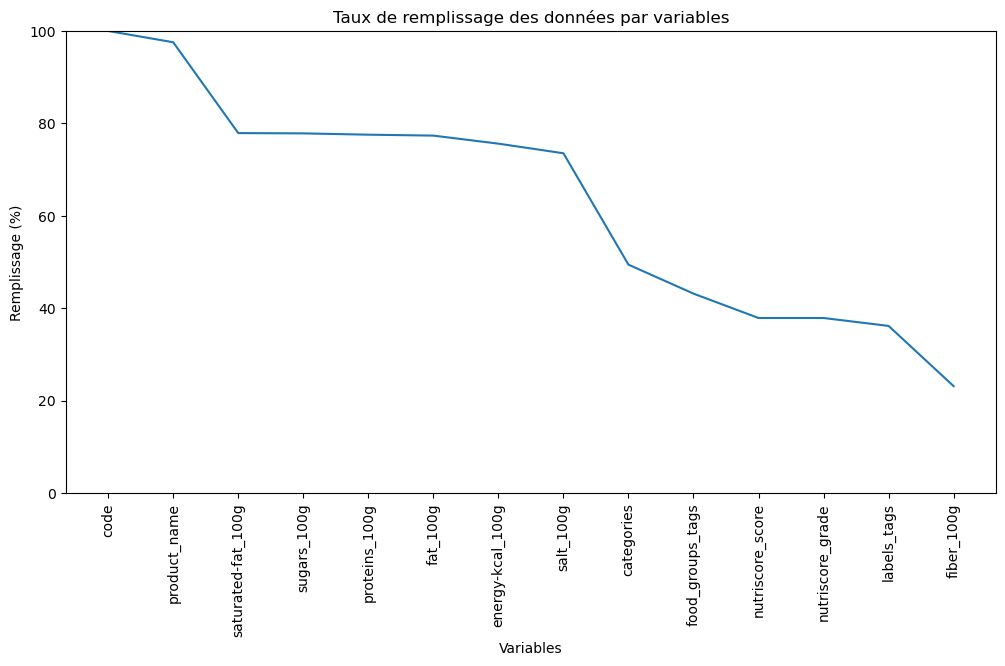

In [320]:
prct_na = data_cleaned.notna().sum() / data_cleaned.shape[0] * 100

plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Taux de remplissage des données par variables')
sns.lineplot(data=prct_na.sort_values(ascending=False)).set(xlabel='Variables', ylabel='Remplissage (%)', ylim=(0,100))

([<matplotlib.patches.Wedge at 0x15f3daa35e0>,
 [Text(-0.44348822814632133, 1.006637070396097, 'filled'),
  Text(0.4434881338981546, -1.0066371119184572, 'unfilled')],
 [Text(-0.24190266989799342, 0.5490747656705983, '63%'),
  Text(0.2419026184899025, -0.5490747883191585, '37%')])

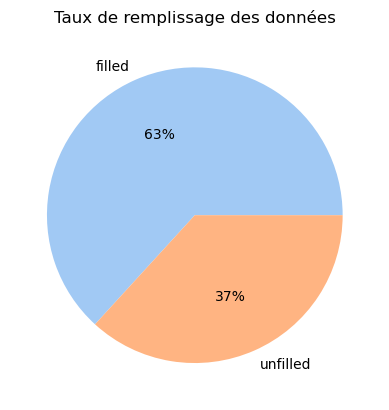

In [321]:
prct_na['filled'] = data_cleaned.notna().sum().sum() / (data_cleaned.shape[0] * data_cleaned.shape[1])

prct_na['unfilled'] = data_cleaned.isna().sum().sum() / (data_cleaned.shape[0] * data_cleaned.shape[1])


colors = sns.color_palette('pastel')
plt.title('Taux de remplissage des données')
plt.pie(prct_na[['filled','unfilled']], labels=prct_na.iloc[-2:].index, colors=colors, autopct='%.0f%%')

### Valeurs aberrantes

In [322]:
stats = data_cleaned.describe()
stats

,nutriscore_score,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,338593.000000,675956.000000,691552.000000,696394.000000,695853.000000,206699.000000,693335.000000,657385.000000
mean,9.466126,276.682111,14.287746,5.419151,13.532758,3.173052,8.988841,1.326574
std,8.669121,201.842853,17.770275,8.098475,20.810367,6.318830,10.415463,10.792953
min,-15.000000,0.000000,-2.000000,0.000000,-0.100000,0.000000,-19.000000,0.000000
25%,2.000000,113.000000,1.000000,0.200000,0.600000,0.100000,1.500000,0.070000
50%,10.000000,264.000000,8.047989,2.000000,3.300000,1.600000,6.300000,0.550000
75%,16.000000,400.000000,22.300000,8.000000,19.000000,3.700000,13.000000,1.330000
max,40.000000,31000.000000,1386.666667,910.000000,3750.000000,1050.400000,2080.000000,5483.000000


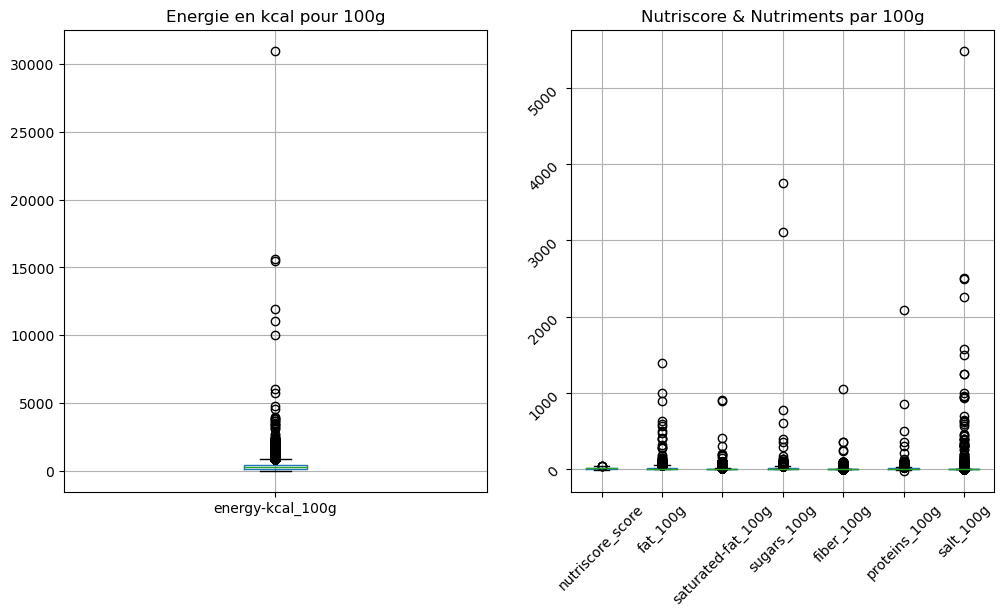

In [326]:
df1 = data_cleaned[['energy-kcal_100g']]
df2 = data_cleaned[['nutriscore_score','fat_100g','saturated-fat_100g', 'sugars_100g',
                     'fiber_100g','proteins_100g','salt_100g']]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df1.boxplot(ax=axs[0])
axs[0].set_title('Energie en kcal pour 100g')

df2.boxplot(ax=axs[1])
axs[1].set_title('Nutriscore & Nutriments par 100g')
axs[1].tick_params(labelrotation=45)

plt.show()

In [327]:
# seuil_max = Q3 + 1.5 IQ
stats.loc['seuil_max'] = stats.apply(lambda x: x["75%"] + 1.5*(x["75%"]-x["25%"]))
stats

,nutriscore_score,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,338593.000000,675956.000000,691552.000000,696394.000000,695853.000000,206699.000000,693335.000000,657385.000000
mean,9.466126,276.682111,14.287746,5.419151,13.532758,3.173052,8.988841,1.326574
std,8.669121,201.842853,17.770275,8.098475,20.810367,6.318830,10.415463,10.792953
min,-15.000000,0.000000,-2.000000,0.000000,-0.100000,0.000000,-19.000000,0.000000
25%,2.000000,113.000000,1.000000,0.200000,0.600000,0.100000,1.500000,0.070000
50%,10.000000,264.000000,8.047989,2.000000,3.300000,1.600000,6.300000,0.550000
75%,16.000000,400.000000,22.300000,8.000000,19.000000,3.700000,13.000000,1.330000
max,40.000000,31000.000000,1386.666667,910.000000,3750.000000,1050.400000,2080.000000,5483.000000
seuil_max,37.000000,830.500000,54.250000,19.700000,46.600000,9.100000,30.250000,3.220000


In [334]:
# Recherche des outliers > seuil_max
out_range = data_cleaned.loc[data_cleaned.gt(stats.loc['seuil_max'], axis=1).any(axis=1)]
out_range.shape

(184682, 14)

In [335]:
out_range.sort_values(by="energy-kcal_100g", ascending=False).head(10)

,code,product_name,categories,labels_tags,nutriscore_score,nutriscore_grade,food_groups_tags,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
428327,3523850964119,Coffee frap Starbucks,NaN,NaN,NaN,NaN,NaN,31000.000000,500.000000,NaN,NaN,NaN,500.000000,NaN
197534,3112541001464,Crème de céréales,NaN,NaN,NaN,NaN,NaN,15642.857143,5.000000,2.857143,7.142857,11.071428,64.285714,NaN
523777,3701142000534,Protéines,NaN,NaN,NaN,NaN,NaN,15480.000000,NaN,NaN,19.200001,NaN,360.000000,NaN
481475,3599010074035,Cheddar and bacon free range eggs,NaN,NaN,NaN,NaN,NaN,11900.000000,900.000000,405.000019,85.000002,NaN,850.000000,NaN
387406,3426327722208,Yaourt fraise🍓 pamplemousse aux huiles essenti...,"Produits laitiers, Desserts, Produits fermenté...",NaN,3.0,c,"en:milk-and-dairy-products,en:milk-and-yogurt",11067.000000,3.230000,2.020000,15.650000,NaN,3.370000,0.110
167786,3016652604197,Sweet Rubarb Jam,NaN,NaN,NaN,NaN,NaN,10000.000000,NaN,NaN,NaN,NaN,NaN,NaN
66783,0303375521850,Organic Hummus Roasted Red Pepper,NaN,NaN,NaN,NaN,NaN,6000.000000,400.000000,NaN,100.000000,100.000000,100.000000,NaN
890473,9354237000021,ProActiv,Oils & Spreads,"en:health-star-rating,en:health-star-rating-3-5",18.0,d,NaN,5710.000000,64.000000,14.000000,10.000000,360.000000,10.000000,0.914
618162,3770015399334,Açaí en poudre,NaN,NaN,NaN,NaN,NaN,4795.000000,43.110001,10.640000,1.280000,29.400000,9.770000,NaN
861413,8711327318816,Caramel Brownie Party,"Produits laitiers, Desserts, Surgelés, Dessert...","en:fair-trade,en:fairtrade-international,en:ca...",25.0,e,"en:milk-and-dairy-products,en:ice-cream",4535.000000,13.000000,8.500000,27.000000,NaN,4.000000,0.500


Valeurs négatives :

In [336]:
data_cleaned.loc[(data_cleaned[['energy-kcal_100g', 'fat_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g']] < 0).any(axis=1)].shape

(5, 14)

On constate plusieurs possibilités :
- Toutes les variables sont aberrantes => l'individu est probablement une erreur, non pertinent pour notre application
- Une seule valeure aberrantes + autres variables non renseignées => l'individu est probablement une erreur, non pertinent pour notre application
- Valeur aberrante mais autres variables ok => Principalement Erreur de formattage (virgule mal placée)

Pour nos variables, voici les différents cas :
- Nutriscore : Ok, valeurs allants de -15 à 40
- Energie : Plusieurs problèmes, difficile d'estimer la limite entre chaques. Formattage, mal renseignés, ...
- fat, sugars, proteins, salt : 
    - Négative : à supprimer car impossible de savoir si erreur de formattage ou non
    - Positives les plus grandes : majoritairement formattage
    - Positives les plus faibles : différents problèmes

#### Suppression des négatifs
(5 produits)

In [338]:
data_selected = data_cleaned.loc[~(data_cleaned[['energy-kcal_100g', 'fat_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g']] < 0).any(axis=1)]
data_selected

,code,product_name,categories,labels_tags,nutriscore_score,nutriscore_grade,food_groups_tags,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,0000000000017,Vitória crackers,NaN,NaN,NaN,NaN,NaN,375.0,7.00,3.08,15.00,NaN,7.800000,1.40
1,0000000000031,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,21.0,0.00,0.00,0.40,NaN,0.200000,2.04
3,0000000000178,Mini coco,NaN,NaN,NaN,NaN,NaN,60.0,3.00,1.00,3.00,NaN,2.000000,1.15
4,0000000000208,Pistou d'ail des ours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894011,3700320230572,glace artisanale corse coco,"Desserts, Surgelés, Desserts glacés, Glaces et...",None,6.0,c,"en:milk-and-dairy-products,en:ice-cream",248.0,15.00,0.00,19.00,NaN,3.000000,0.03
894012,3700439700348,None,"Petit-déjeuners, Produits à tartiner, Produits...",en:pdo,NaN,None,"en:sugary-snacks,en:sweets",NaN,NaN,NaN,NaN,NaN,NaN,NaN
894013,3770008983205,REMYX VODKA Aquatique,"Boissons,Boissons alcoolisées,Alcools forts,Ea...",None,NaN,None,en:alcoholic-beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894014,6703501220017,Farine T45,"Aliments et boissons à base de végétaux,Alimen...",None,-5.0,a,"en:cereals-and-potatoes,en:cereals",351.0,0.82,0.13,9.06,4.6,0.122001,0.01


#### Suppression des individus ayant moins de 4 données renseignées (code + nom + 2 variables => <30%)

In [339]:
columns = ['code', 'product_name', 'energy-kcal_100g', 'fat_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g']
mask = data_selected[columns].T.notna().sum() / 9

data_selected = data_selected.loc[mask.loc[mask > 0.3].index]
data_selected

,code,product_name,categories,labels_tags,nutriscore_score,nutriscore_grade,food_groups_tags,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
0,0000000000017,Vitória crackers,NaN,NaN,NaN,NaN,NaN,375.0,7.00,3.08,15.00,NaN,7.800000,1.40
2,0000000000123,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,21.0,0.00,0.00,0.40,NaN,0.200000,2.04
3,0000000000178,Mini coco,NaN,NaN,NaN,NaN,NaN,60.0,3.00,1.00,3.00,NaN,2.000000,1.15
7,0000000000949,Salade de carottes râpées,"Aliments et boissons à base de végétaux, Alime...",NaN,1.0,b,"en:composite-foods,en:one-dish-meals",32.0,0.30,0.10,3.90,NaN,0.900000,0.42
8,0000000000970,Fromage blanc aux myrtilles,NaN,NaN,NaN,NaN,NaN,129.0,4.90,3.10,16.30,NaN,4.400000,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894006,3033610080541,Saupon fumé sauvage du pacifique,en:saumon fumé sauvage du pacifique,None,11.0,d,None,123.0,2.60,0.60,0.80,NaN,24.000000,2.90
894009,3560070278831,"Pamplemousse rose, 100 % Pur Fruit Pressé","en:plant-based-foods-and-beverages,en:beverage...","en:carrefour-quality,en:distributor-labels,en:...",2.0,c,"en:beverages,en:unsweetened-beverages",36.0,0.00,0.00,8.50,NaN,0.000000,0.00
894010,3564700673683,Rosé de Fronton,None,None,NaN,None,None,NaN,NaN,0.00,0.00,NaN,NaN,NaN
894011,3700320230572,glace artisanale corse coco,"Desserts, Surgelés, Desserts glacés, Glaces et...",None,6.0,c,"en:milk-and-dairy-products,en:ice-cream",248.0,15.00,0.00,19.00,NaN,3.000000,0.03


#### Vérification du nombre de produits ou nutriments >100g 

In [340]:
data_selected.loc[(data_cleaned[['fat_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g']] > 100).any(axis=1)]

,code,product_name,categories,labels_tags,nutriscore_score,nutriscore_grade,food_groups_tags,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
2528,0021000047208,Mild sauce,NaN,en:contains-gmos,NaN,NaN,NaN,0.000000,0.0,0.00,0.000000,NaN,0.00000,1250.000000
2551,0021000644216,Zesty italian dressing,"Condiments, Sauces, Salad dressings, Groceries",NaN,10.0,c,"en:fats-and-sauces,en:dressings-and-sauces",60.000000,4.5,0.50,2.000000,NaN,0.00000,300.000000
7015,0051500253625,Crisco Pure Vegetable Oil,"Plant-based foods and beverages, Plant-based f...","en:low-or-no-sugar,en:no-gluten,en:omega-3,en:...",NaN,NaN,"en:fats-and-sauces,en:fats",857.000000,129.0,14.30,NaN,NaN,0.00000,0.000000
8469,0059749873543,Cherry cerise jelly powder,NaN,NaN,NaN,NaN,NaN,380.952381,0.0,0.00,85.714286,0.00,9.52381,952.380952
9981,0065912006243,Clamato,NaN,NaN,NaN,NaN,NaN,24.000000,0.0,0.00,4.400000,0.40,0.40000,620.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882023,8904004403640,"Haldiram's Tasty Nut,150G",NaN,NaN,NaN,NaN,NaN,640.000000,50.0,8.00,0.000000,6.00,22.00000,1250.000000
883035,8935024143353,Café Instantané Chaud Ou Froid,"Aliments et boissons à base de végétaux, Boiss...",en:halal,NaN,NaN,NaN,500.000000,12.5,6.25,50.000000,6.25,6.25000,938.000000
888204,9120097310569,Choco Banana Milk Snack,NaN,en:made-in-italy,NaN,NaN,NaN,520.000000,35.0,24.00,38.000000,NaN,4.90000,340.000000
889377,9310421000093,Nuttelex Buttery,"Plant-based foods and beverages, Plant-based f...","en:vegetarian,en:no-gluten,en:vegan,en:austral...",30.0,e,"en:salty-snacks,en:salty-and-fatty-products",NaN,65.0,169.00,0.000000,0.00,0.00000,8.500000


Seulement 113 produits. On se permet de les supprimer.

In [341]:
data_selected = data_selected.loc[~(data_cleaned[['fat_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g']] > 100).any(axis=1)]
data_selected.describe()

,nutriscore_score,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,338130.000000,675825.000000,691441.000000,696293.000000,695743.000000,206637.000000,693225.000000,657280.000000
mean,9.475941,276.553978,14.273580,5.413989,13.517999,3.161011,8.981362,1.271987
std,8.667986,196.644707,17.522037,7.916339,19.930711,5.719202,10.021765,4.195533
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,113.000000,1.000000,0.200000,0.600000,0.100000,1.500000,0.070000
50%,10.000000,264.000000,8.010000,2.000000,3.300000,1.600000,6.300000,0.550000
75%,16.000000,400.000000,22.300000,8.000000,19.000000,3.700000,13.000000,1.324078
max,40.000000,15642.857143,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


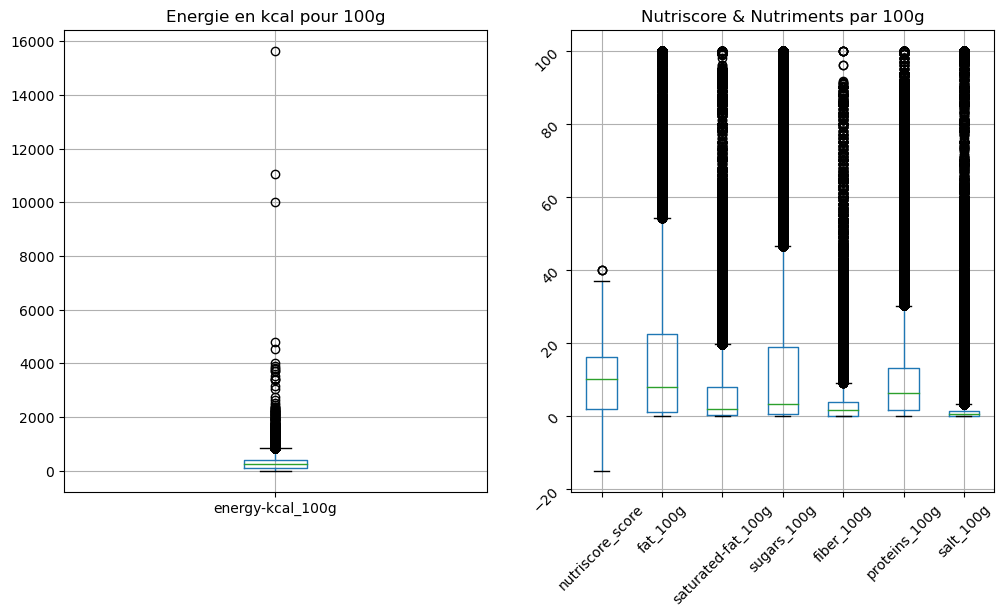

In [342]:
df1 = data_selected[['energy-kcal_100g']]
df2 = data_selected[['nutriscore_score','fat_100g','saturated-fat_100g', 'sugars_100g',
                     'fiber_100g','proteins_100g','salt_100g']]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df1.boxplot(ax=axs[0])
axs[0].set_title('Energie en kcal pour 100g')

df2.boxplot(ax=axs[1])
axs[1].set_title('Nutriscore & Nutriments par 100g')
axs[1].tick_params(labelrotation=45)

plt.show()

Le reste des outliers sont des valeurs atypiques (protéines en poudre, sirops de sucres, ....)

### Traitement des valeurs manquantes
Pour faire cela, on a 3 options :
- Remplacer par 0, mean ou median
- Utiliser un knn
- Utiliser un IterativeImputer

[Text(0.5, 0, 'Variables'), Text(0, 0.5, 'Remplissage (%)'), (0.0, 100.0)]

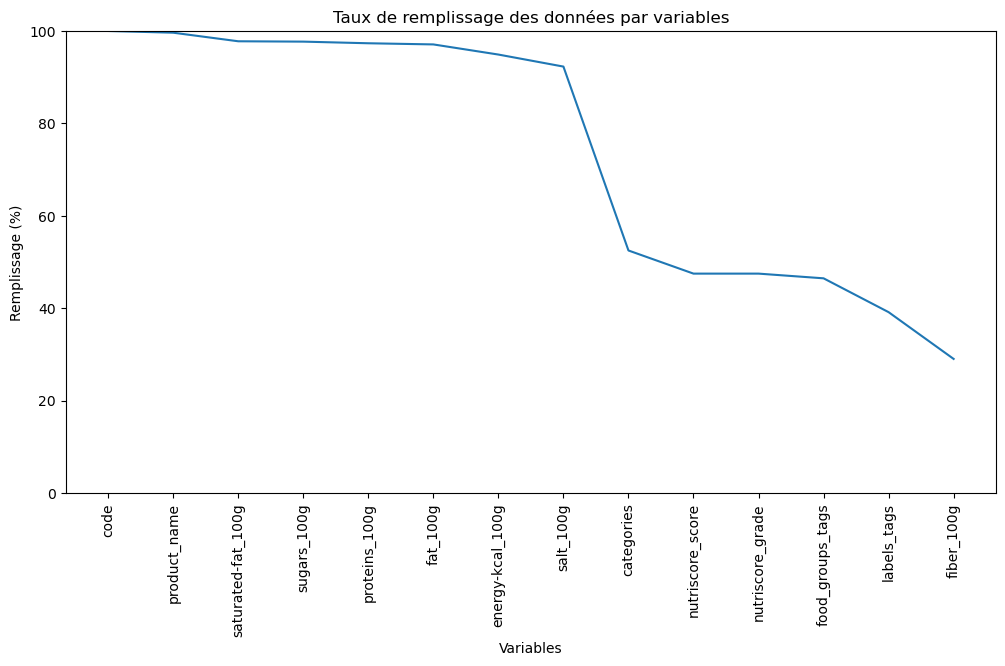

In [343]:
prct_na = data_selected.notna().sum() / data_selected.shape[0] * 100
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Taux de remplissage des données par variables')
sns.lineplot(data=prct_na.sort_values(ascending=False)).set(xlabel='Variables', ylabel='Remplissage (%)', ylim=(0,100))

([<matplotlib.patches.Wedge at 0x160351a9cd0>,
 [Text(-0.7579582760291403, 0.7971820694163496, 'filled'),
  Text(0.7579582760291399, -0.7971820694163501, 'unfilled')],
 [Text(-0.4134317869249856, 0.4348265833180089, '74%'),
  Text(0.41343178692498533, -0.43482658331800905, '26%')])

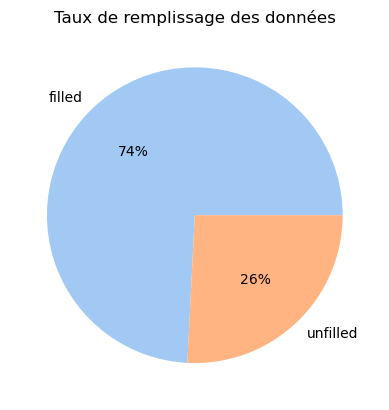

In [344]:
prct_na['filled'] = data_selected.notna().sum().sum() / (data_selected.shape[0] * data_selected.shape[1])

prct_na['unfilled'] = data_selected.isna().sum().sum() / (data_selected.shape[0] * data_selected.shape[1])


colors = sns.color_palette('pastel')
plt.title('Taux de remplissage des données')
plt.pie(prct_na[['filled','unfilled']], labels=prct_na.iloc[-2:].index, colors=colors, autopct='%.0f%%')

###  Utilisation d'un algorithme KNN pour Nutriscore
Pour cette variable, seulement 30% de remplissage. Le nutriscore est un calcul basé sur les nutriments.

C:\Users\octav\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\octav\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

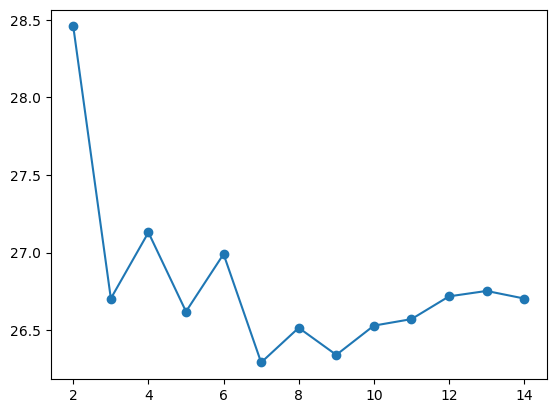

In [345]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors

mask = data_selected.T.notna().sum() / 14
df_knn = data_selected[['fat_100g',
       'saturated-fat_100g', 'sugars_100g','proteins_100g',
       'salt_100g']].loc[mask.loc[mask > 0.99].index].to_numpy()
target_knn = data_selected[['nutriscore_grade']].loc[mask.loc[mask > 0.99].index]
target_knn = target_knn.iloc[:,0].to_numpy()

xtrain, xtest, ytrain, ytest = train_test_split(df_knn, target_knn, train_size=0.8)

errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

Modèle le plus performant : 7-nn, malgré un fort taux d'erreur

In [346]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(7)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)
predicted

C:\Users\octav\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['a', 'd', 'a', ..., 'a', 'd', 'c'], dtype=object)

In [347]:
missing_nutri = data_selected[['nutriscore_grade']].loc[data_selected['nutriscore_grade'].isna()]
missing_datas = data_selected[['fat_100g',
       'saturated-fat_100g', 'sugars_100g','proteins_100g',
       'salt_100g']].loc[data_selected['nutriscore_grade'].isna() & data_selected[['fat_100g',
       'saturated-fat_100g', 'sugars_100g','proteins_100g',
       'salt_100g']].notna().all(axis=1)].to_numpy()


predicted = knn.predict(missing_datas)
predicted

C:\Users\octav\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['c', 'c', 'c', ..., 'c', 'c', 'b'], dtype=object)

In [348]:
# Insertion des prédictions dans les nutricore grade correspondant
data_selected.loc[data_selected['nutriscore_grade'].isna() & data_selected[['fat_100g',
       'saturated-fat_100g', 'sugars_100g','proteins_100g',
       'salt_100g']].notna().all(axis=1), 'nutriscore_grade'] = predicted

[Text(0.5, 0, 'Variables'), Text(0, 0.5, 'Remplissage (%)'), (0.0, 100.0)]

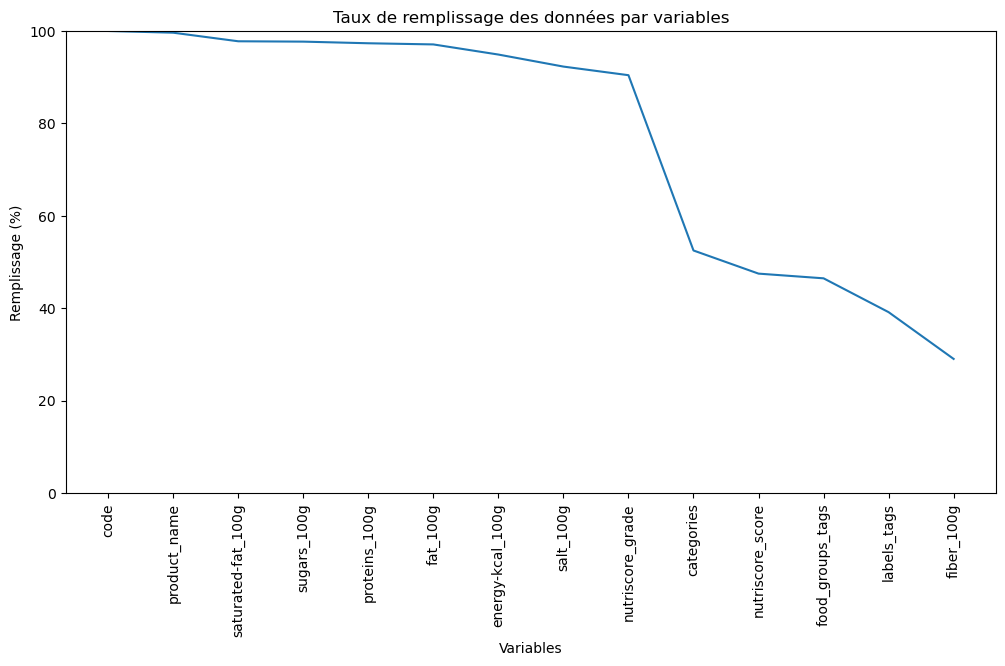

In [349]:
prct_na = data_selected.notna().sum() / data_selected.shape[0] * 100
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Taux de remplissage des données par variables')
sns.lineplot(data=prct_na.sort_values(ascending=False)).set(xlabel='Variables', ylabel='Remplissage (%)', ylim=(0,100))

([<matplotlib.patches.Wedge at 0x15dd65280a0>,
 [Text(-0.8311545013755134, 0.7205429861175681, 'filled'),
  Text(0.8311544676444604, -0.7205430250267181, 'unfilled')],
 [Text(-0.45335700075027996, 0.39302344697321895, '77%'),
  Text(0.45335698235152383, -0.3930234681963916, '23%')])

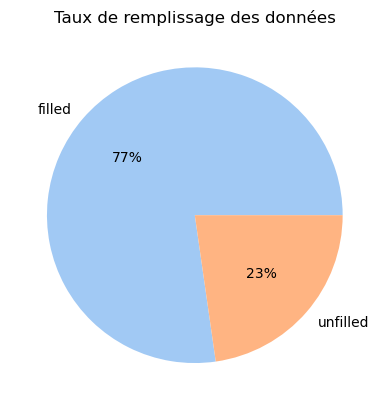

In [350]:
prct_na['filled'] = data_selected.notna().sum().sum() / (data_selected.shape[0] * data_selected.shape[1])

prct_na['unfilled'] = data_selected.isna().sum().sum() / (data_selected.shape[0] * data_selected.shape[1])


colors = sns.color_palette('pastel')
plt.title('Taux de remplissage des données')
plt.pie(prct_na[['filled','unfilled']], labels=prct_na.iloc[-2:].index, colors=colors, autopct='%.0f%%')

# Saving data File

In [351]:
data_selected.to_csv('data_cleaned.csv', sep='\t')